In [1]:
# Lets create the dataset for the classification

# Since we will be using Neural Net model, lets create a non-linear dataset
import numpy as np
from sklearn.datasets import make_circles

# Make 1000 samples

X, y = make_circles(n_samples=1000, noise = 0.03, random_state = 7)

print(f'Print - Len of X is {len(X)} & Y is {len(y)} followed by Type: {type(X)}')

Print - Len of X is 1000 & Y is 1000 followed by Type: <class 'numpy.ndarray'>


In [2]:
# Print First 5 Samples
print(f'First 5 Samples: {X[:5]}, {y[:5]}')

First 5 Samples: [[-0.75681927 -0.27401115]
 [-0.48167671 -0.87409407]
 [-0.97024009 -0.25205207]
 [-0.66094436 -0.49907384]
 [-0.90793058  0.40841756]], [1 0 0 1 0]


In [3]:
# Convert the Data into DataFrame
import pandas as pd
circles = pd.DataFrame({"X1":X[:, 0], "X2":X[:, 1], "label":y})
circles.head()

,X1,X2,label
0,-0.756819,-0.274011,1
1,-0.481677,-0.874094,0
2,-0.970240,-0.252052,0
3,-0.660944,-0.499074,1
4,-0.907931,0.408418,0


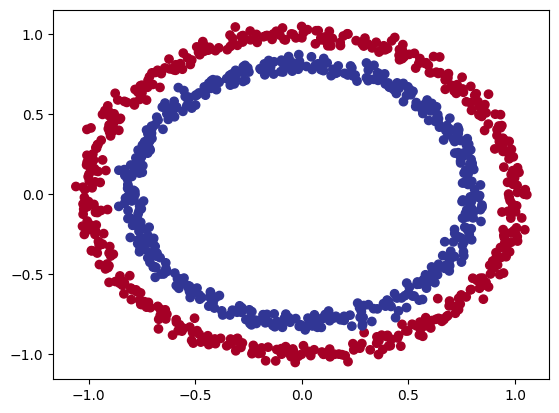

In [4]:
import matplotlib.pyplot as plt

plt.scatter(x = X[:, 0], y = X[:, 1], c = y, cmap = plt.cm.RdYlBu)
plt.show()

## Convert the Datasets into Tensors and create Train Test Split

### Why Tensors?

* **GPU Acceleration:** Neural networks heavily rely on matrix operations. Tensors are specifically designed to efficiently leverage the parallel processing capabilities of GPUs, making computations significantly faster. NumPy arrays or Pandas Dataframes might not offer this optimized GPU utilization.

* **Framework Compatibility:** Deep learning frameworks like TensorFlow and PyTorch are built around Tensors. These frameworks provide a wealth of tools, pre-built layers, optimization algorithms, and automatic differentiation capabilities that are seamlessly integrated with Tensor operations.

* **Automatic Differentiation:** A core component of neural network training is backpropagation, which relies on calculating gradients. Deep learning frameworks automatically handle gradient computations for Tensors, making the training process much simpler.

#### Can't I use NumPy or Pandas directly?

* Technically: While you might be able to construct very basic neural network models using only NumPy, it would be significantly more complex and less efficient. You'd have to manually implement many low-level operations and optimizations that are readily available in deep learning frameworks.

* Practicality: For any real-world application, directly using NumPy or Pandas is not recommended. The benefits of Tensors and deep learning frameworks in terms of performance, ease of use, and access to advanced features far outweigh the minor inconvenience of converting your data.

#### Does it really matter?

* For small datasets or simple models: The difference might not be very noticeable.

* For large datasets or complex models: The performance gains from using Tensors and GPUs become crucial. Training times can be reduced from days or hours to minutes or seconds.

In [7]:
# Check if Torch is Installed
import torch

torch.__version__

'2.4.0+cu121'

In [11]:
# Turn the Data into Tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [12]:
# Check the Type
type(X), type(y)

(torch.Tensor, torch.Tensor)

In [22]:
# Split the Data into Train and Test

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, 
                                                test_size=0.20, 
                                                random_state = 7)

len(xtrain), len(xtest), len(ytrain), len(ytest)

(800, 200, 800, 200)

### Building a Model

Let's build a model to classify blue and red dots.
To do so, we want to:
1. Setup device agnostic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing nn.Module)
3. Define a loss function and optimizer.
4. Create a training and test loop

#### Why it is called Device Agnostic?
It's called "device agnostic code" because it allows your code to run seamlessly on different types of hardware (devices), specifically either a CPU or a GPU with CUDA capabilities, without requiring you to modify the code itself depending on the available hardware.

In [23]:
# Import Torch and Check for GPU (Cuda)
import torch
from torch import nn

# Make Device Agnostic Code.
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Remember each Dense layer with a relu activation implements the following chain of tensor operations: ``output = relu(dot(input, W) + b)``

In [24]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers

# Lets build a Model

model = keras.Sequential([layers.Dense(16, activation = "relu"),
                         layers.Dense(16, activation = "relu"),
                         layers.Dense(1, activation = "sigmoid")])

# Compile Stage
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy",
              metrics = ["accuracy"])

# Lets fit the model
model.fit(xtrain, ytrain, epochs = 5, batch_size = 512)
results = model.evaluate(xtest, ytest)

Epoch 1/5


I0000 00:00:1725766718.603034     838 service.cc:146] XLA service 0x7f2a640166d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725766718.603140     838 service.cc:154]   StreamExecutor device (0): NVIDIA H100 80GB HBM3, Compute Capability 9.0
2024-09-08 03:38:38.628852: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-08 03:38:38.823699: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


1/2 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5176 - loss: 0.6907

I0000 00:00:1725766720.899443     838 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.5167 - loss: 0.6922
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5180 - loss: 0.6877 
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5147 - loss: 0.6850 
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5226 - loss: 0.6805 
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5173 - loss: 0.6825 
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.4375 - loss: 0.7024


In [25]:
results

[0.7019236087799072, 0.4350000023841858]

In [26]:
from tensorflow.keras import regularizers

# Model with more layers, regularization, and different activation
model = keras.Sequential([
    layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.01)),  # L2 regularization
    layers.Dropout(0.2),  # Dropout for regularization
    layers.Dense(32, activation="tanh"),  # Different activation function
    layers.Dense(1, activation="sigmoid")
])

# Compile with a different optimizer and a smaller learning rate
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss="binary_crossentropy", 
              metrics=["accuracy"])

# Fit with early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.fit(xtrain, ytrain, epochs=20, batch_size=256, validation_split=0.2, callbacks=[early_stopping]) 

results = model.evaluate(xtest, ytest)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5246 - loss: 0.7333 - val_accuracy: 0.4875 - val_loss: 0.7285
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5081 - loss: 0.7318 - val_accuracy: 0.5000 - val_loss: 0.7268
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5146 - loss: 0.7313 - val_accuracy: 0.5063 - val_loss: 0.7250
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4828 - loss: 0.7282 - val_accuracy: 0.5063 - val_loss: 0.7232
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4964 - loss: 0.7289 - val_accuracy: 0.4875 - val_loss: 0.7217
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5021 - loss: 0.7228 - val_accuracy: 0.5063 - val_loss: 0.7204
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5031 - loss: 0.7242 - val_accuracy: 0.5250 - val_loss: 0.7196
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5147 - loss: 0.7199 - val_accuracy: 0.5375 - val_loss: 0.7184
Ep

In [27]:
results

[0.7024174332618713, 0.5049999952316284]

In [44]:
# Lets build a Model

model = keras.Sequential([layers.Dense(32, activation = "relu"),
                          layers.Dense(64, activation = "relu"),
                          layers.Dense(32, activation = "relu"),
                          layers.Dense(64, activation = "relu"),
                          layers.Dense(1, activation = "sigmoid")])

# Compile Stage
model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy",
              metrics = ["accuracy"])

# Lets fit the model
model.fit(xtrain, ytrain, epochs = 150, batch_size =512)
results = model.evaluate(xtest, ytest)

Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4944 - loss: 0.0000e+00
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5199 - loss: 0.0000e+00 
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5134 - loss: 0.0000e+00 
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5160 - loss: 0.0000e+00 
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5095 - loss: 0.0000e+00
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5239 - loss: 0.0000e+00 
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5199 - loss: 0.0000e+00 
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5128 - loss: 0.0000e+00 
Epoch 9/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5115 - loss: 0.0000e+00 
Epoch 10/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5141 - loss: 0.0000e+00 
Epoch 11/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5219 - loss: 0.0000e+00
Epoch 12/150
2/2 ━━━━━━━━━━━━━━━

In [45]:
results

[0.0, 0.4350000023841858]

In [46]:
circles.head()


,X1,X2,label
0,-0.756819,-0.274011,1
1,-0.481677,-0.874094,0
2,-0.970240,-0.252052,0
3,-0.660944,-0.499074,1
4,-0.907931,0.408418,0


In [52]:
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping

model = keras.Sequential([
    layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization
    layers.BatchNormalization(),
    layers.Dropout(0.2),  # Dropout for regularization
    layers.Dense(64, activation="tanh"), 
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(32, activation="tanh"),
    layers.BatchNormalization(),
    layers.Dense(64, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

# Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,           # Stop if val_loss doesn't improve for 5 consecutive epochs
    restore_best_weights=True  # Restore model weights from the epoch with the best val_loss
)

# Compile with a different optimizer and consider a smaller learning rate
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss="binary_crossentropy", 
              metrics=["accuracy"])

# Fit the model (you can experiment with different batch sizes and epochs)
model.fit(xtrain, ytrain, epochs=100, batch_size=512, validation_data=(xtest, ytest),  # Provide validation data
          callbacks=[early_stopping]) 
results = model.evaluate(xtest, ytest)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.5277 - loss: 0.7082 - val_accuracy: 0.4350 - val_loss: 0.6981
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.6143 - loss: 0.6628 - val_accuracy: 0.4350 - val_loss: 0.6969
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.6198 - loss: 0.6582 - val_accuracy: 0.4350 - val_loss: 0.6956
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6071 - loss: 0.6504 - val_accuracy: 0.4350 - val_loss: 0.6939
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.6633 - loss: 0.6274 - val_accuracy: 0.4350 - val_loss: 0.6917
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.6910 - loss: 0.5955 - val_accuracy: 0.4350 - val_loss: 0.6889
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6847 - loss: 0.6006 - val_accuracy: 0.4350 - val_loss: 0.6860
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.7250 - loss: 0.5725 - val_accuracy: 0.4350 - val_loss: 

In [81]:
# Build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- non-linearity
    def forward(self, x):
        # Where should we put our non-linear activation functions?
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [82]:
# Create a loss function for multi-class classification
# setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),lr=0.1)

In [83]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [88]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train, y_train = xtrain.to(device), ytrain.to(device)
X_test, y_test = xtest.to(device), ytest.to(device)
# lopp
epochs = 1000
for epoch in range(epochs):
    # Training
    model_3.train()
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probs -> pred labels
    # 2. Calculate the loss
    loss = loss_fn(y_logits, y_train) #BCEWithLogitLoss (takes in logits as first input)
    acc = accuracy_fn(y_true=y_train,y_pred=y_pred)
    # 3. optimizer zero grad
    optimizer.zero_grad()
    # 4. loss backward
    loss.backward()
    # 5. optimizer step
    optimizer.step()
    # Testing
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test,
        y_pred=test_pred)
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.53322, Acc: 87.75% | Test Loss: 0.54183, Test Acc: 85.00%
Epoch: 100 | Loss: 0.43736, Acc: 92.88% | Test Loss: 0.44333, Test Acc: 94.50%
Epoch: 200 | Loss: 0.32334, Acc: 98.62% | Test Loss: 0.32007, Test Acc: 99.00%
Epoch: 300 | Loss: 0.21890, Acc: 99.88% | Test Loss: 0.21031, Test Acc: 100.00%
Epoch: 400 | Loss: 0.14782, Acc: 100.00% | Test Loss: 0.14041, Test Acc: 100.00%
Epoch: 500 | Loss: 0.10672, Acc: 100.00% | Test Loss: 0.10129, Test Acc: 100.00%
Epoch: 600 | Loss: 0.08196, Acc: 100.00% | Test Loss: 0.07769, Test Acc: 100.00%
Epoch: 700 | Loss: 0.06597, Acc: 100.00% | Test Loss: 0.06277, Test Acc: 100.00%
Epoch: 800 | Loss: 0.05493, Acc: 100.00% | Test Loss: 0.05247, Test Acc: 100.00%
Epoch: 900 | Loss: 0.04702, Acc: 100.00% | Test Loss: 0.04491, Test Acc: 100.00%


In [119]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, metrics

# 1. Build the Model
model = models.Sequential([
  layers.Dense(10, activation='relu', input_shape = (2, )),  # Input layer with 2 features, 10 neurons: input_shape=(2,)
  layers.Dense(10, activation='relu'), # Hidden layer with 10 neurons
  layers.Dense(1, activation='sigmoid')]) # Output layer for binary classification)

In [96]:
# 2. Compile the Model (Set up how it learns)
model.compile(
  optimizer='sgd',                                     # Using Stochastic Gradient Descent
  loss=losses.BinaryCrossentropy(),     # Loss function for binary classification 
  metrics=['accuracy']                                  # Track accuracy during training
)

# 3. Train the Model
# epoch: # Number of times to go through the data
# batch size: # How many samples to process at once
#model.fit(xtrain, ytrain,epochs=1000,batch_size=512)

# 4. Evaluate the Model (See how well it does on new data)
#results = model.evaluate(xtest, ytest)                 # Your testing data and labels
#print("Test Loss:", results[0])
#print("Test Accuracy:", results[1])

In [ ]:
# Compile with a different optimizer and learning rate

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss="binary_crossentropy",  # Adjust from_logits if needed
              metrics=["accuracy"])

# Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,           # Stop if val_loss doesn't improve for 5 consecutive epochs
    restore_best_weights=True  # Restore model weights from the epoch with the best val_loss
)

# Fit the model with more epochs and a smaller batch size
model.fit(xtrain, ytrain, epochs=250, batch_size=64,  validation_data=(xtest, ytest),  # Provide validation data
          callbacks=[early_stopping]) 
results = model.evaluate(xtest, ytest)
print("Test Loss:", results[0])
print("Test Accuracy:", results[1])

Epoch 1/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.5259 - loss: 0.6876 - val_accuracy: 0.4350 - val_loss: 0.6939
Epoch 2/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5159 - loss: 0.6897 - val_accuracy: 0.4350 - val_loss: 0.6937
Epoch 3/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5292 - loss: 0.6866 - val_accuracy: 0.4350 - val_loss: 0.6941
Epoch 4/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5255 - loss: 0.6852 - val_accuracy: 0.4350 - val_loss: 0.6940
Epoch 5/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5214 - loss: 0.6857 - val_accuracy: 0.4350 - val_loss: 0.6936
Epoch 6/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5140 - loss: 0.6862 - val_accuracy: 0.4350 - val_loss: 0.6934
Epoch 7/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5361 - loss: 0.6837 - val_accuracy: 0.4350 - val_loss: 0.6935
Epoch 8/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5001 - loss: 0.6853 - val_accuracy: 0.4350

[0.2137242704629898, 1.0]